# Evolutionary Ensemble Learning (EEL) for
## Binary Neural Networks (BNN)

In [1]:
# for local testing
import sys
sys.path.append('../autopandas')
%load_ext autoreload
%autoreload 2

In [2]:
from eel import EEL
import autopandas as apd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPClassifier
from time import time # compute training time
from asizeof import asizeof # compute memory usage

In [3]:
data = apd.read_csv('../autopandas/autopandas/data/mushrooms.csv')
data.set_class('class')

# to have labels beginning by 0 and avoid missing data
data = data.process()

In [4]:
# data
X_train = np.array(data('X_train'))
y_train = np.array(data('y_train'))
X_test = np.array(data('X_test'))
y_test = np.array(data('y_test'))

In [5]:
# model
layers = [data.input_size(), 10, data.output_size()]
model = EEL(layers=layers, n_estimators=8, l=32)
# int8 instead of true binary variables
print('Memory allocated to model: {}'.format(asizeof(model)))

Memory allocated to model: 10368


In [6]:
data.shape

(8124, 23)

Elapsed time: 4.966513395309448


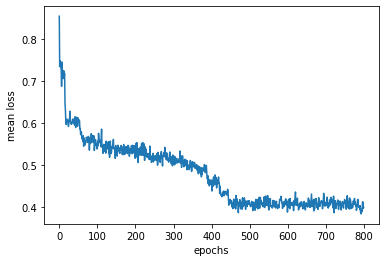

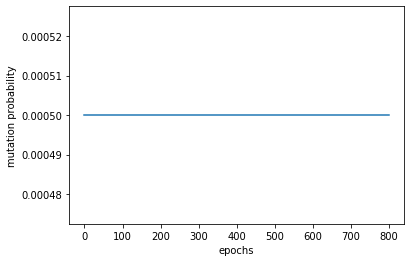

In [16]:
# training
model.fit(X_train, y_train, epochs=200, p=0.0005, constant_p=True, batch_size=200,
          multi_batch=True, random_batch=True, keep=False, force_diversity=False, loss_function='log_loss', verbose=True)

In [17]:
y_pred = model.predict(X_train, soft=False)
print('EEL-BNN training score: {}'.format(accuracy_score(y_train, y_pred)))
y_pred = model.predict(X_test, soft=False)
print('EEL-BNN testing score: {}'.format(accuracy_score(y_test, y_pred)))

EEL-BNN training score: 0.7754527870582029
EEL-BNN testing score: 0.7747230201066886


In [9]:
# MLP with the same architecture for comparison

clf = MLPClassifier(hidden_layer_sizes=(10,), max_iter=200)
print('Memory allocated to model: {}'.format(asizeof(clf)))
t0 = time()
clf.fit(X_train, y_train)
t1 = time()
print('Elapsed time: {}'.format(t1 - t0))

Memory allocated to model: 2576


/usr/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:921: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Elapsed time: 1.48173189163208


/usr/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [10]:
print('MLP training score: {}'.format(clf.score(X_train, y_train)))
print('MLP testing score: {}'.format(clf.score(X_test, y_test)))

MLP training score: 0.9975382451204502
MLP testing score: 0.9975379565038982


In [11]:
# baseline for comparison
print('Baseline score (Random Forest)')
data.score()

Baseline score (Random Forest)


1.0